In [1]:
import sys
import json

sys_path = json.load(open('../../paths.json',))['sys_path']

sys.path.append(sys_path)

print(os.getcwd())

from dataloader import *

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import numpy as np

plt.rcParams['image.cmap'] = 'viridis'

c:\Users\nilso\Documents\EPFL\PDM\PDM_PINN\DNN_Test\Training_Data_Dataset


In [2]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [3]:
training_data = dataset('../Training_Data/Moseley_Homogeneous/','../Training_Data/Moseley_Homogeneous.csv')
sample = training_data.__getitem__(0)

## Plot one sample

[]

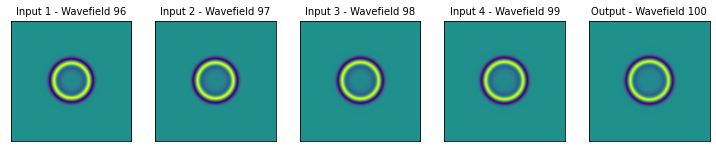

In [4]:
# # # Plot
fig, axs = plt.subplots(1,5,figsize=(10,2),constrained_layout=True)

wavefields_inputs = sample['wave_input'].transpose(1, 0).detach().numpy()
wavefields_outputs = sample['wave_output'].transpose(1, 0).detach().numpy()

axs = axs.ravel()
for _i, ax in enumerate(axs[:-1]):
    if _i == 0 :
        im = ax.imshow(wavefields_inputs[_i,:,:], norm=MidpointNormalize(midpoint=0))
        clim = im.get_clim()
    else:
        ax.imshow(wavefields_inputs[_i,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
    
    wavefield = sample['wave_output_label'] - 4 + _i
    ax.set_title(f'Input {_i+1} - Wavefield {wavefield}',fontsize=10)

axs[-1].imshow(wavefields_outputs[0,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
axs[-1].set_title('Output - Wavefield {}'.format(sample['wave_output_label']),fontsize=10)

plt.setp(axs, xticks=[], yticks=[])
#plt.savefig('Sample_Homogeneous.pdf',dpi=300,bbox_inches='tight')

## Plot one batch of 5 samples

In [5]:
# # # Get samples
torch.manual_seed(2)
dataloader = DataLoader(training_data, batch_size=4, shuffle=True)
samples = next(iter(dataloader))

[]

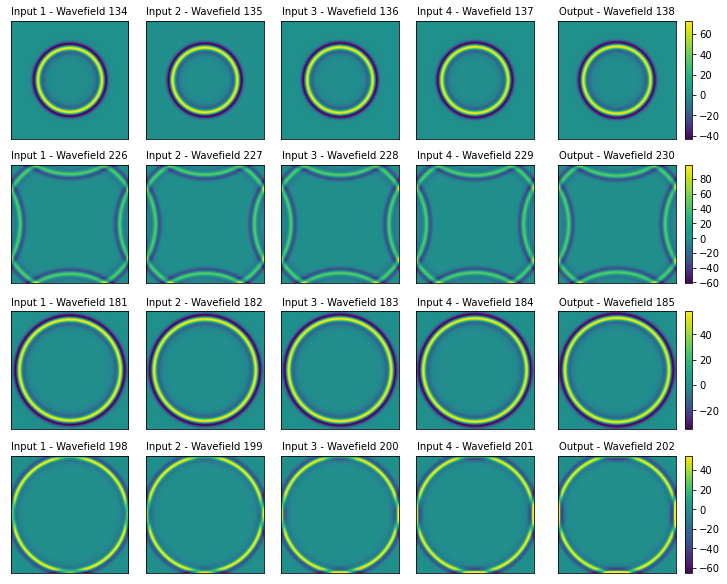

In [6]:
# # # Plot
wavefields_inputs = samples['wave_input'].transpose(2, 1).detach().numpy()
wavefields_outputs = samples['wave_output'].transpose(2, 1).detach().numpy()

fig, axs = plt.subplots(samples['wave_input'].__len__(),5,figsize=(10,samples['wave_input'].__len__()*2),constrained_layout=True)

for row in range(samples['wave_input'].__len__()):
    for column in range(4):
        if column == 0:
            im = axs[row,column].imshow(wavefields_inputs[row,column,:,:], norm=MidpointNormalize(midpoint=0))
            clim = im.get_clim()
        else:
            axs[row,column].imshow(wavefields_inputs[row,column,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)

        wavefield = samples['wave_output_label'][row].detach().numpy() - 4 + column
        axs[row,column].set_title(f'Input {column+1} - Wavefield {wavefield}',fontsize=10)
        
    
    axs[row,-1].imshow(wavefields_outputs[row,0,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
    axs[row,-1].set_title('Output - Wavefield {}'.format(samples['wave_output_label'][row]),fontsize=10)

    #ax_divider = make_axes_locatable(axs[row,-1])
    #cax = ax_divider.append_axes("right", size="7%", pad="2%")
    fig.colorbar(im, ax=axs[row,-1],shrink=1)
plt.setp(axs, xticks=[], yticks=[])
#plt.savefig('Batch_Homogeneous.pdf',dpi=300,bbox_inches='tight')

## Layered domain - Plot one sample

In [7]:
training_data = dataset('../Training_Data/Moseley_EARTH/','../Training_Data/Moseley_EARTH.csv',velocity_field='../Training_Data/Velocity_Field_1.npy')
sample = training_data.__getitem__(100)

[]

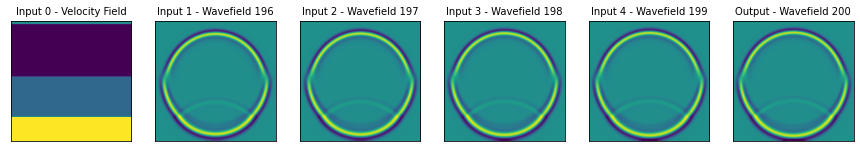

In [8]:
# # # Plot
fig, axs = plt.subplots(1,6,figsize=(12,2),constrained_layout=True)

wavefields_inputs = sample['wave_input'].transpose(1, 0).detach().numpy()
wavefields_outputs = sample['wave_output'].transpose(1, 0).detach().numpy()

axs = axs.ravel()
for _i, ax in enumerate(axs[1:-1]):
    if _i == 0 :
        im = ax.imshow(wavefields_inputs[_i,:,:], norm=MidpointNormalize(midpoint=0))
        clim = im.get_clim()
    else:
        ax.imshow(wavefields_inputs[_i,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
    
    wavefield = sample['wave_output_label'] - 4 + _i
    ax.set_title(f'Input {_i+1} - Wavefield {wavefield}',fontsize=10)

axs[-1].imshow(wavefields_outputs[0,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
axs[-1].set_title('Output - Wavefield {}'.format(sample['wave_output_label']),fontsize=10)

axs[0].imshow(wavefields_inputs[-1])
axs[0].set_title('Input 0 - Velocity Field',fontsize=10)

plt.setp(axs, xticks=[], yticks=[])
#plt.savefig('Sample_Layered.pdf',dpi=300,bbox_inches='tight')

In [9]:
# # # Get samples
torch.manual_seed(2)
dataloader = DataLoader(training_data, batch_size=4, shuffle=True)
samples = next(iter(dataloader))

[]

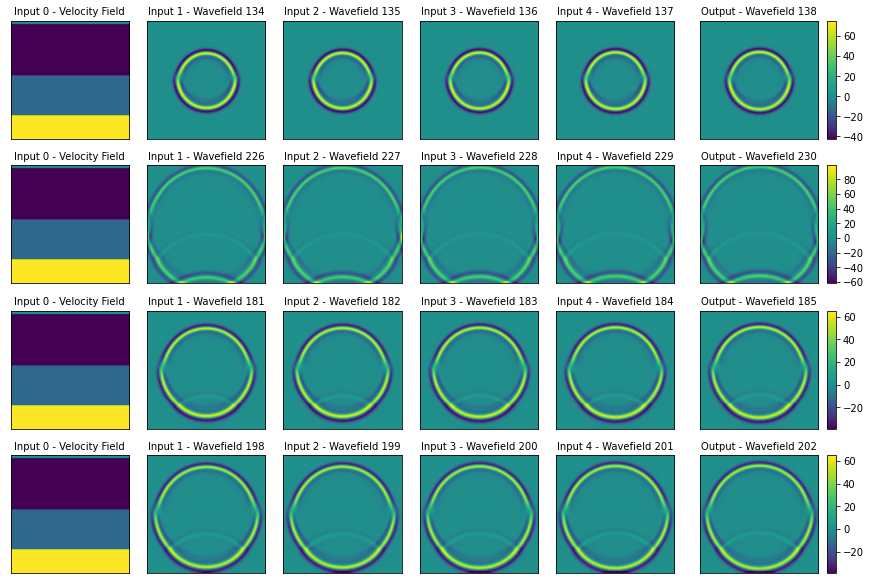

In [10]:
# # # Plot
wavefields_inputs = samples['wave_input'].transpose(2, 1).detach().numpy()
wavefields_outputs = samples['wave_output'].transpose(2, 1).detach().numpy()

fig, axs = plt.subplots(samples['wave_input'].__len__(),6,figsize=(12,samples['wave_input'].__len__()*2),constrained_layout=True)

for row in range(samples['wave_input'].__len__()):
    for column in range(4):
        if column == 0:
            im = axs[row,column+1].imshow(wavefields_inputs[row,column,:,:], norm=MidpointNormalize(midpoint=0))
            clim = im.get_clim()
        else:
            axs[row,column+1].imshow(wavefields_inputs[row,column,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)

        # Title
        wavefield = samples['wave_output_label'][row].detach().numpy() - 4 + column
        axs[row,column+1].set_title(f'Input {column+1} - Wavefield {wavefield}',fontsize=10)
        
    # Output
    axs[row,-1].imshow(wavefields_outputs[row,0,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
    axs[row,-1].set_title('Output - Wavefield {}'.format(samples['wave_output_label'][row]),fontsize=10)

    # Velocity field
    axs[row,0].imshow(wavefields_inputs[row,-1,:,:])
    axs[row,0].set_title('Input 0 - Velocity Field',fontsize=10)

    #ax_divider = make_axes_locatable(axs[row,-1])
    #cax = ax_divider.append_axes("right", size="7%", pad="2%")
    fig.colorbar(im, ax=axs[row,-1],shrink=1)
plt.setp(axs, xticks=[], yticks=[])
#plt.savefig('Batch_Layered.pdf',dpi=300,bbox_inches='tight')

## Figures Edges Dataset - Homogeneous Domain

In [11]:
class dataset(Dataset):
    def __init__(self, dir_path, csv_file, velocity_field=None):
        super(dataset, self).__init__()

        self.dir_path = dir_path
        self.csv_file = pd.read_csv(csv_file,index_col=0)

        self.velocity_field = velocity_field # Path to velocity field

        if self.velocity_field:
            self.velocity_field_values = np.load(self.velocity_field)

        self.output = self.csv_file['y'] # Update : Changed y_number to y

        self.transform = transforms.Compose([
    transforms.ToTensor()
])

    def __len__(self):
        return self.csv_file.shape[0]
        
    def __getitem__(self, index):

        # Get the indice for the output wavefield
        self.output_im = self.csv_file.loc[index,'y_number'].astype(int)

        inputs = [cv2.imread(self.dir_path + f"{self.output[index].split('_')[0]}_{im}.tiff" ,cv2.IMREAD_UNCHANGED).T for im in range(self.output_im-4,self.output_im)]
        #print(list(self.dir_path + f"{self.output[index].split('_')[0]}_{im}.tiff" for im in range(self.output_im-4,self.output_im))) # For debugging

        if self.velocity_field:
            inputs.append(self.velocity_field_values.T)
        
        outputs = [cv2.imread(self.dir_path + f"{self.output[index].split('_')[0]}_{im}.tiff",cv2.IMREAD_UNCHANGED).T for im in [self.output_im]]
        #print(list(self.dir_path + f'{self.output[index]}' for im in [index])) # For debugging

        inputs = self.transform(np.array(inputs)).float()
        outputs = self.transform(np.array(outputs)).float()
        sample = {"wave_input": inputs,
                    "wave_input_label":self.output[index],
                    "wave_output": outputs,
                    "wave_output_label":self.output_im}
        return sample

Text(0, 0.5, 'EVENT0006')

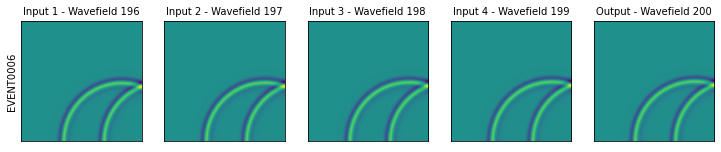

In [12]:
training_data = dataset('../Training_Data/Moseley_Homogeneous_3/','../Training_Data/Moseley_Homogeneous_3_Train.csv',velocity_field='../Training_Data/Velocity_Field_Crack_1.npy')
sample_number = 100
sample = training_data.__getitem__(sample_number)

# # # Plot
fig, axs = plt.subplots(1,5,figsize=(10,2),constrained_layout=True)

wavefields_inputs = sample['wave_input'].transpose(1, 0).detach().numpy()
wavefields_outputs = sample['wave_output'].transpose(1, 0).detach().numpy()

axs = axs.ravel()
for _i, ax in enumerate(axs[:-1]):
    if _i == 0 :
        im = ax.imshow(wavefields_inputs[_i,:,:], norm=MidpointNormalize(midpoint=0))
        clim = im.get_clim()
    else:
        ax.imshow(wavefields_inputs[_i,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
    
    wavefield = sample['wave_output_label'] - 4 + _i
    ax.set_title(f'Input {_i+1} - Wavefield {wavefield}',fontsize=10)

axs[-1].imshow(wavefields_outputs[0,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
axs[-1].set_title('Output - Wavefield {}'.format(sample['wave_output_label']),fontsize=10)

plt.setp(axs, xticks=[], yticks=[])

axs[0].set_ylabel(f'{sample["wave_input_label"].split("_")[0]}')
#plt.savefig('Sample_Homogeneous_Edge.pdf',dpi=300,bbox_inches='tight')

In [13]:
training_data = dataset('../Training_Data/Moseley_Crack_1/','../Training_Data/Moseley_Crack_1_Train.csv',velocity_field='../Training_Data/Velocity_Field_Crack_1.npy')

In [14]:
# # # Get samples
torch.manual_seed(2)
dataloader = DataLoader(training_data, batch_size=4, shuffle=True)
samples = next(iter(dataloader))

[]

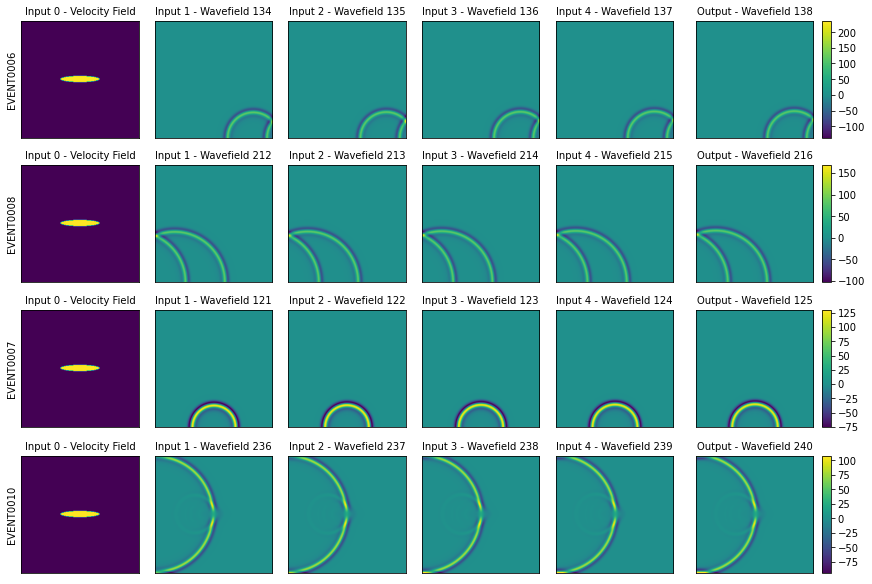

In [15]:
# # # Plot
wavefields_inputs = samples['wave_input'].transpose(2, 1).detach().numpy()
wavefields_outputs = samples['wave_output'].transpose(2, 1).detach().numpy()

fig, axs = plt.subplots(samples['wave_input'].__len__(),6,figsize=(12,samples['wave_input'].__len__()*2),constrained_layout=True)

for row in range(samples['wave_input'].__len__()):
    for column in range(4):
        if column == 0:
            im = axs[row,column+1].imshow(wavefields_inputs[row,column,:,:], norm=MidpointNormalize(midpoint=0))
            clim = im.get_clim()
        else:
            axs[row,column+1].imshow(wavefields_inputs[row,column,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)

        # Title
        wavefield = samples['wave_output_label'][row].detach().numpy() - 4 + column
        axs[row,column+1].set_title(f'Input {column+1} - Wavefield {wavefield}',fontsize=10)

        axs[row,0].set_ylabel(f'{samples["wave_input_label"][row].split("_")[0]}')
        
    # Output
    axs[row,-1].imshow(wavefields_outputs[row,0,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
    axs[row,-1].set_title('Output - Wavefield {}'.format(samples['wave_output_label'][row]),fontsize=10)

    # Velocity field
    axs[row,0].imshow(wavefields_inputs[row,-1,:,:])
    axs[row,0].set_title('Input 0 - Velocity Field',fontsize=10)

    #ax_divider = make_axes_locatable(axs[row,-1])
    #cax = ax_divider.append_axes("right", size="7%", pad="2%")
    fig.colorbar(im, ax=axs[row,-1],shrink=1)
plt.setp(axs, xticks=[], yticks=[])
#plt.savefig('Batch_Homogeneous_Edge.pdf',dpi=300,bbox_inches='tight')

## Schema Train Test - Sources

In [19]:
import json
import re
from matplotlib.lines import Line2D
from matplotlib.patches import Ellipse

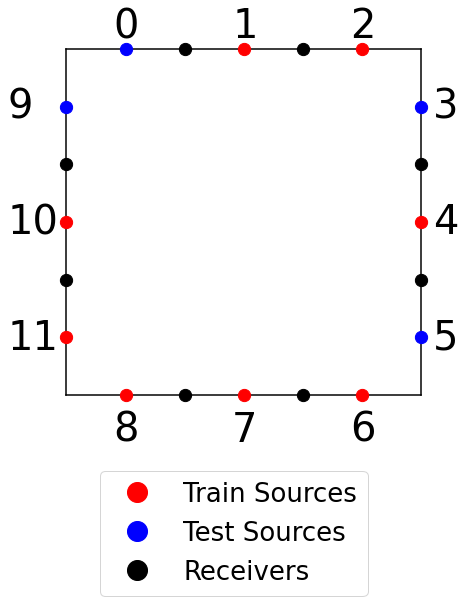

In [21]:
events_train = ['Event0001','Event0002','Event0004','Event0006','Event0007','Event0008','Event0010','Event0011']
events_test = ['Event0000','Event0003','Event0005','Event0009']

fig, ax = plt.subplots(figsize=(7,7))

plt.plot([0,1500],[1500,1500],'k',zorder=-1)
plt.plot([0,0],[0,1500],'k',zorder=-1)
plt.plot([0,1500],[0,0],'k',zorder=-1)
plt.plot([1500,1500],[0,1500],'k',zorder=-1)

# Sources - Train and Test
for events in [events_train,events_test]:
    for event in events :
        # Load receivers data to obtain the coordinates
        path = f"E:/PDM_SALVUS/NoCrack/Moseley_Homogeneous_3/{event}/meta.json"
        f = open(path,)
        data = json.load(f)

        rec = data['forward_run_input']['physics']['wave_equation']['point_source'][0]['location']
        if event in events_train :
            plt.scatter(rec[0],rec[1],s=150,c='r')

            regex = r'[A-Za-z]+'
            event = re.sub(regex, "", event).lstrip("0")

            if rec[0] == 1500:
                plt.text(rec[0]+50,rec[1]-50,event,fontsize=40)   
            elif rec[0] == 0:
                plt.text(rec[0]-250,rec[1]-50,event,fontsize=40)
            elif rec[1] == 0:
                plt.text(rec[0]-50,rec[1]-200,event,fontsize=40)
            else :
                plt.text(rec[0]-50,rec[1]+50,event,fontsize=40)
        if event in events_test :

            regex = r'[A-Za-z]+'
            event = re.sub(regex, "", event)[3:]

            plt.scatter(rec[0],rec[1],s=150,c='b')

            if rec[0] == 1500:
                plt.text(rec[0]+50,rec[1]-50,event,fontsize=40)   
            elif rec[0] == 0:
                plt.text(rec[0]-250,rec[1]-50,event,fontsize=40)
            elif rec[1] == 0:
                plt.text(rec[0]-50,rec[1]-200,event,fontsize=40)
            else :
                plt.text(rec[0]-50,rec[1]+50,event,fontsize=40)

# Receivers

x_recs = pd.DataFrame.from_dict(data['forward_run_input']['output']['point_data']['receiver'])['location'].apply(pd.Series).astype(int)[0].values
y_recs = pd.DataFrame.from_dict(data['forward_run_input']['output']['point_data']['receiver'])['location'].apply(pd.Series).astype(int)[1].values

plt.scatter(x_recs,y_recs,s=150,c='k')

fig.patch.set_visible(False)
ax.axis('off')

custom_lines = [Line2D([0], [0], marker='o', color='r', lw=0, markersize=20),
                Line2D([0], [0], marker='o', color='b', lw=0, markersize=20),
                Line2D([0], [0], marker='o', color='k', lw=0, markersize=20)]

ax.legend(custom_lines, ['Train Sources', 'Test Sources', 'Receivers'],bbox_to_anchor=(0.85,-0.12),ncol=1,fontsize=26)
#plt.savefig('schema_edges.pdf',dpi=300,bbox_inches='tight')

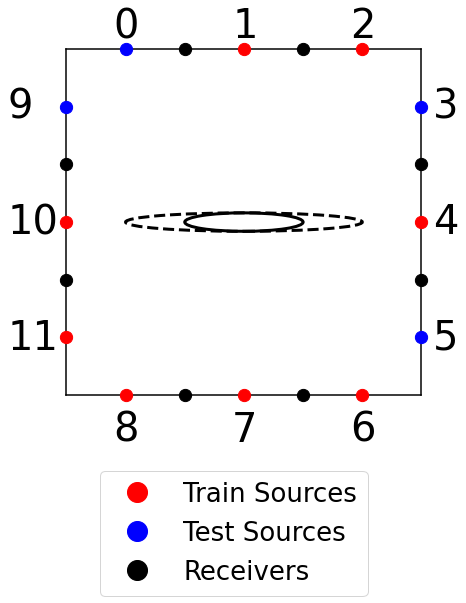

In [22]:
events_train = ['Event0001','Event0002','Event0004','Event0006','Event0007','Event0008','Event0010','Event0011']
events_test = ['Event0000','Event0003','Event0005','Event0009']

fig, ax = plt.subplots(figsize=(7,7))

plt.plot([0,1500],[1500,1500],'k',zorder=-1)
plt.plot([0,0],[0,1500],'k',zorder=-1)
plt.plot([0,1500],[0,0],'k',zorder=-1)
plt.plot([1500,1500],[0,1500],'k',zorder=-1)

# Sources - Train and Test
for events in [events_train,events_test]:
    for event in events :
        # Load receivers data to obtain the coordinates
        path = f"E:/PDM_SALVUS/NoCrack/Moseley_Homogeneous_3/{event}/meta.json"
        f = open(path,)
        data = json.load(f)

        rec = data['forward_run_input']['physics']['wave_equation']['point_source'][0]['location']
        if event in events_train :
            plt.scatter(rec[0],rec[1],s=150,c='r')

            regex = r'[A-Za-z]+'
            event = re.sub(regex, "", event).lstrip("0")

            if rec[0] == 1500:
                plt.text(rec[0]+50,rec[1]-50,event,fontsize=40)   
            elif rec[0] == 0:
                plt.text(rec[0]-250,rec[1]-50,event,fontsize=40)
            elif rec[1] == 0:
                plt.text(rec[0]-50,rec[1]-200,event,fontsize=40)
            else :
                plt.text(rec[0]-50,rec[1]+50,event,fontsize=40)
        if event in events_test :

            regex = r'[A-Za-z]+'
            event = re.sub(regex, "", event)[3:]

            plt.scatter(rec[0],rec[1],s=150,c='b')

            if rec[0] == 1500:
                plt.text(rec[0]+50,rec[1]-50,event,fontsize=40)   
            elif rec[0] == 0:
                plt.text(rec[0]-250,rec[1]-50,event,fontsize=40)
            elif rec[1] == 0:
                plt.text(rec[0]-50,rec[1]-200,event,fontsize=40)
            else :
                plt.text(rec[0]-50,rec[1]+50,event,fontsize=40)

# Receivers

x_recs = pd.DataFrame.from_dict(data['forward_run_input']['output']['point_data']['receiver'])['location'].apply(pd.Series).astype(int)[0].values
y_recs = pd.DataFrame.from_dict(data['forward_run_input']['output']['point_data']['receiver'])['location'].apply(pd.Series).astype(int)[1].values

plt.scatter(x_recs,y_recs,s=150,c='k')

# Ellipse
ellipse_big = Ellipse(xy=(750, 750), width=1000, height=80, 
                        edgecolor='k', fc='None', lw=3,linestyle='--')
ellipse_small = Ellipse(xy=(750, 750), width=500, height=80, 
                        edgecolor='k', fc='None', lw=3)
ax.add_patch(ellipse_big)
ax.add_patch(ellipse_small)

fig.patch.set_visible(False)
ax.axis('off')

custom_lines = [Line2D([0], [0], marker='o', color='r', lw=0, markersize=20),
                Line2D([0], [0], marker='o', color='b', lw=0, markersize=20),
                Line2D([0], [0], marker='o', color='k', lw=0, markersize=20)]

ax.legend(custom_lines, ['Train Sources', 'Test Sources', 'Receivers'],bbox_to_anchor=(0.85,-0.12),ncol=1,fontsize=26)
#plt.savefig('schema_edges.pdf',dpi=300,bbox_inches='tight')